In [126]:
using Pkg
# Pkg.add("DataFrames")
# Pkg.add("CSV")
# Pkg.add("Plots")
# Pkg.add("Statistics")
# Pkg.add("FreqTables")
using DataFrames
using Plots
using Statistics
using CSV
using Dates
using FreqTables

In [127]:
df = DataFrame(CSV.File("transactions_cleaned.csv"))

Row,Date,Description,Amount,Transaction_Type,Category,Account_Name
,String15,String15,Float64,String7,String31,String7
1,12/15/2022,Transaction 1,31.25,debit,Shopping,A1
2,10/18/2022,Transaction 5,79.74,debit,Food_Dining,BCC2
3,9/20/2022,Transaction 6,81.69,debit,Food_Dining,BCC1
4,10/03/2022,Transaction 7,80.48,debit,Food_Dining,BCC2
5,9/10/2022,Transaction 8,62.17,debit,Food_Dining,BCC2
6,9/12/2022,Transaction 9,66.81,debit,Bills_Utilities,BCC1
7,12/08/2022,Transaction 10,4.99,debit,Shopping,CCC1
8,9/15/2022,Transaction 11,15.68,debit,Shopping,BCC1
9,11/29/2022,Transaction 12,32.31,debit,Shopping,CCC1


In [128]:
println("Minimum: ", minimum(df.Amount), "\nMaximum: ", maximum(df.Amount), "\nMean: ", mean(df.Amount), "\nMedian: ", median(df.Amount))

Minimum: 0.01
Maximum: 2151.0
Mean: 50.52248587570621
Median: 10.0


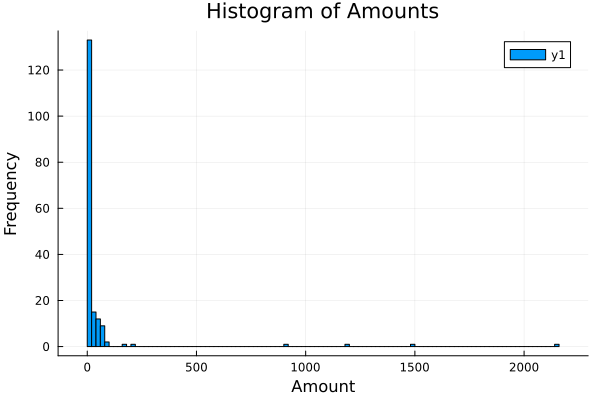

In [129]:
# plot histogram over time
Plots.histogram(df.Amount, bins=100, title="Histogram of Amounts", xlabel="Amount", ylabel="Frequency")

In [130]:
# convert Date column to DateTime
df.Date = Date.(df.Date, "m/d/y")

177-element Vector{Date}:
 2022-12-15
 2022-10-18
 2022-09-20
 2022-10-03
 2022-09-10
 2022-09-12
 2022-12-08
 2022-09-15
 2022-11-29
 2022-12-04
 ⋮
 2022-11-29
 2022-12-05
 2022-12-06
 2022-12-10
 2022-10-27
 2022-12-04
 2022-09-19
 2022-10-12
 2022-12-19

In [131]:
# remove rows if they have B, C, W, A as they are debit accounts
df = filter!(row -> !(row.Account_Name in ["B", "C", "W", "A"]), df)


# remove rows if they have the category "Credit Card Payment"
df = filter!(row -> !(row.Category in ["Credit Card Payment", "Deposit", "Paycheck"]), df)

Row,Date,Description,Amount,Transaction_Type,Category,Account_Name
,Date,String15,Float64,String7,String31,String7
1,2022-12-15,Transaction 1,31.25,debit,Shopping,A1
2,2022-10-18,Transaction 5,79.74,debit,Food_Dining,BCC2
3,2022-09-20,Transaction 6,81.69,debit,Food_Dining,BCC1
4,2022-10-03,Transaction 7,80.48,debit,Food_Dining,BCC2
5,2022-09-10,Transaction 8,62.17,debit,Food_Dining,BCC2
6,2022-09-12,Transaction 9,66.81,debit,Bills_Utilities,BCC1
7,2022-12-08,Transaction 10,4.99,debit,Shopping,CCC1
8,2022-09-15,Transaction 11,15.68,debit,Shopping,BCC1
9,2022-11-29,Transaction 12,32.31,debit,Shopping,CCC1


In [132]:
# sort dateframe by amount 
sort(df, :Amount, rev=true)

Row,Date,Description,Amount,Transaction_Type,Category,Account_Name
,Date,String15,Float64,String7,String31,String7
1,2022-11-29,Transaction 33,1493.62,debit,Shopping,BCC1
2,2022-11-29,Transaction 34,1196.81,debit,Shopping,BCC2
3,2022-11-28,Transaction 32,900.0,debit,Shopping,A1
4,2022-12-18,Transaction 15,215.49,debit,Shopping,CCC1
5,2022-11-30,Transaction 21,176.18,debit,Shopping,CCC1
6,2022-09-20,Transaction 6,81.69,debit,Food_Dining,BCC1
7,2022-10-03,Transaction 7,80.48,debit,Food_Dining,BCC2
8,2022-10-18,Transaction 5,79.74,debit,Food_Dining,BCC2
9,2022-10-31,Transaction 149,75.62,debit,Food_Dining,BCC1


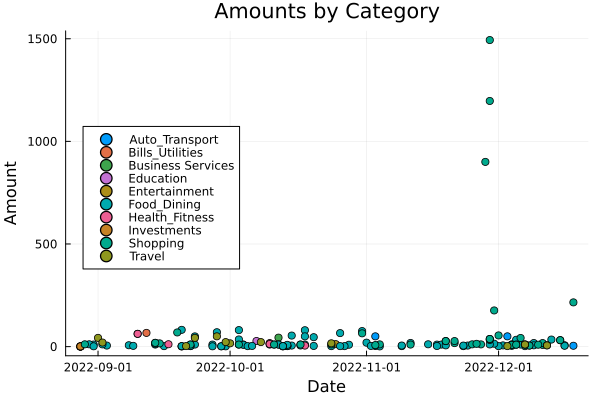

In [133]:
# categorical plot by category
Plots.scatter(df.Date, df.Amount, group=df.Category, title="Amounts by Category", xlabel="Date", ylabel="Amount", legend=:left)

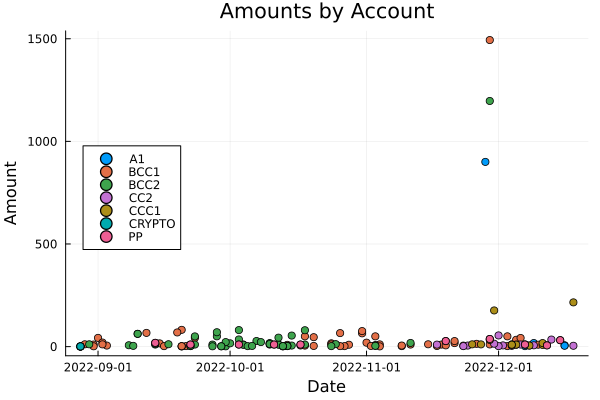

In [134]:
# plot by account
Plots.scatter(df.Date, df.Amount, group=df.Account_Name, title="Amounts by Account", xlabel="Date", ylabel="Amount", legend=:left)

Lower: -22.784999999999997
Upper: 48.85499999999999

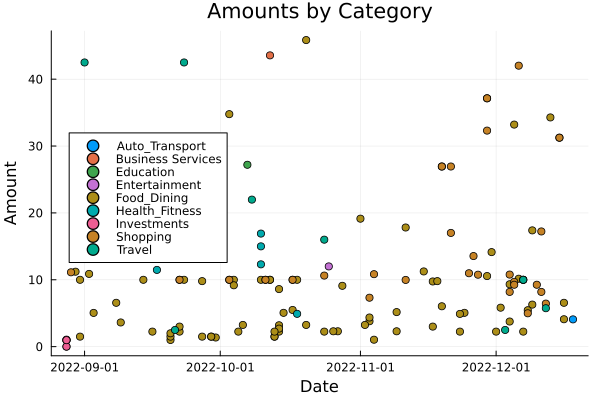

In [135]:
# calculate outliers 
q1 = quantile(df.Amount, 0.25)
q3 = quantile(df.Amount, 0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
println("Lower: ", lower, "\nUpper: ", upper)

# remove outliers
df = filter(row -> row.Amount > lower, df)


df = filter(row -> row.Amount < upper, df)
# plot scatterplot 
Plots.scatter(df.Date, df.Amount, group=df.Category, title="Amounts by Category", xlabel="Date", ylabel="Amount", legend=:left)

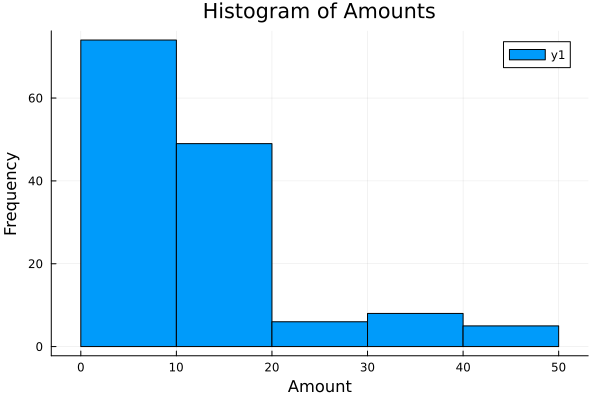

In [136]:

binwidth = 2 * iqr * length(df.Amount)^(-1 / 3) # calculate binwidth, 2*iqr*n^(-1/3) using Freedman–Diaconis rule

# plot histogram
Plots.histogram(df.Amount, bins=trunc(Int64, binwidth), title="Histogram of Amounts", xlabel="Amount", ylabel="Frequency")

In [137]:
# sort df by Date
sort(df, :Date)

Row,Date,Description,Amount,Transaction_Type,Category,Account_Name
,Date,String15,Float64,String7,String31,String7
1,2022-08-28,Transaction 96,0.01,credit,Investments,CRYPTO
2,2022-08-28,Transaction 97,0.97,credit,Investments,CRYPTO
3,2022-08-28,Transaction 98,0.97,credit,Investments,CRYPTO
4,2022-08-28,Transaction 99,0.01,credit,Investments,CRYPTO
5,2022-08-28,Transaction 100,1.05,debit,Investments,CRYPTO
6,2022-08-28,Transaction 101,0.97,debit,Investments,CRYPTO
7,2022-08-29,Transaction 260,11.12,debit,Shopping,BCC1
8,2022-08-30,Transaction 160,11.21,debit,Food_Dining,BCC2
9,2022-08-31,Transaction 91,10.0,debit,Food_Dining,BCC1


In [138]:
df_before_october_3rd = filter(row -> row.Date < Date(2022, 10, 3), df)
df_after_october_3rd = filter(row -> row.Date >= Date(2022, 10, 3), df)

Row,Date,Description,Amount,Transaction_Type,Category,Account_Name
,Date,String15,Float64,String7,String31,String7
1,2022-12-15,Transaction 1,31.25,debit,Shopping,A1
2,2022-12-08,Transaction 10,4.99,debit,Shopping,CCC1
3,2022-11-29,Transaction 12,32.31,debit,Shopping,CCC1
4,2022-12-04,Transaction 13,10.78,debit,Shopping,CCC1
5,2022-11-21,Transaction 14,17.01,debit,Shopping,BCC1
6,2022-12-11,Transaction 20,8.19,credit,Shopping,CCC1
7,2022-12-11,Transaction 22,17.23,debit,Shopping,CCC1
8,2022-11-27,Transaction 24,10.76,debit,Shopping,CCC1
9,2022-11-25,Transaction 25,10.98,debit,Shopping,CCC1


In [139]:

println(freqtable(df_before_october_3rd.Category))
println(freqtable(df_after_october_3rd.Category))

5-element Named Vector{Int64}
Dim1                       │ 
───────────────────────────┼───
String31("Food_Dining")    │ 23
String31("Health_Fitness") │  1
String31("Investments")    │  6
String31("Shopping")       │  4
String31("Travel")         │  6
8-element Named Vector{Int64}
Dim1                          │ 
──────────────────────────────┼───
String31("Auto_Transport")    │  1
String31("Business Services") │  1
String31("Education")         │  1
String31("Entertainment")     │  1
String31("Food_Dining")       │ 58
String31("Health_Fitness")    │  4
String31("Shopping")          │ 31
String31("Travel")            │  5


In [140]:
#  i know :( it looks ugly but it works
b4 = []
categories = ["Food_Dining", "Shopping", "Public_Transportation", "Health_Fitness", "Investments", "Travel", "Auto_Transport", "Bills_Utilities", "Education", "Food_Delivery", "Entertainment", "Business_Services"]
for i in 1:length(categories)
    push!(b4, sum(filter(row -> occursin(categories[i], row.Category), df_before_october_3rd).Amount))
end

In [141]:
aft = []
for i in 1:length(categories)
    push!(aft, sum(filter(row -> occursin(categories[i], row.Category), df_after_october_3rd).Amount))
end

In [142]:
differences = [] 
for i in 1:12
    push!(differences, aft[i] - b4[i])
end

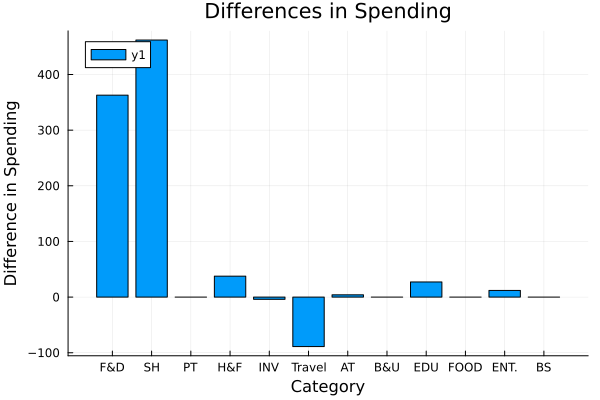

In [143]:
# plot bar graph,put a legend on the bar graph
Plots.bar(["F&D", "SH", "PT", "H&F", "INV", "Travel", "AT", "B&U", "EDU", "FOOD", "ENT.", "BS"], differences, title="Differences in Spending", xlabel="Category", ylabel="Difference in Spending", legend=:topleft)

In [144]:
for i in 1:12
    if differences[i] > 0
        print("You spent more. Amount spent: ", round(differences[i]), " dollars, ")
        print("Category: ", categories[i], " \n")
    else
        print("You spent less. Amount spent: ", round(differences[i]), " dollars, ")
        print("Category: ", categories[i], " \n")
    end
end


You spent more. Amount spent: 363.0 dollars, Category: Food_Dining 
You spent more. Amount spent: 462.0 dollars, Category: Shopping 
You spent less. Amount spent: 0.0 dollars, Category: Public_Transportation 
You spent more. Amount spent: 38.0 dollars, Category: Health_Fitness 
You spent less. Amount spent: -4.0 dollars, Category: Investments 
You spent less. Amount spent: -89.0 dollars, Category: Travel 
You spent more. Amount spent: 4.0 dollars, Category: Auto_Transport 
You spent less. Amount spent: 0.0 dollars, Category: Bills_Utilities 
You spent more. Amount spent: 27.0 dollars, Category: Education 
You spent less. Amount spent: 0.0 dollars, Category: Food_Delivery 
You spent more. Amount spent: 12.0 dollars, Category: Entertainment 
You spent less. Amount spent: 0.0 dollars, Category: Business_Services 
